In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install rasterio

!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 49.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#REMOVE ALPHA CHANNEL

In [ ]:
import numpy as np
import imageio

def remove_alpha_channel(input_path, output_path):
    # Read the image with alpha channel using imageio
    image_with_alpha = imageio.imread(input_path)

    # Remove the alpha channel
    image_without_alpha = image_with_alpha[:, :, :3]

    # Save the image without alpha channel
    imageio.imwrite(output_path, image_without_alpha)

# Usage example

input_path = '/content/drive/MyDrive/Temporary/4 of June images/Kfirst.png'
output_path = '/content/drive/MyDrive/Temporary/4 of June images/KfirstNoAlpha.png'
remove_alpha_channel(input_path, output_path)


<ipython-input-6-7dfd8392e444>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_with_alpha = imageio.imread(input_path)


###See what pixel values are what class in image

Used this website: https://pixspy.com/


#F1 scores for each damage type in the Kahramanmaraş with shadows

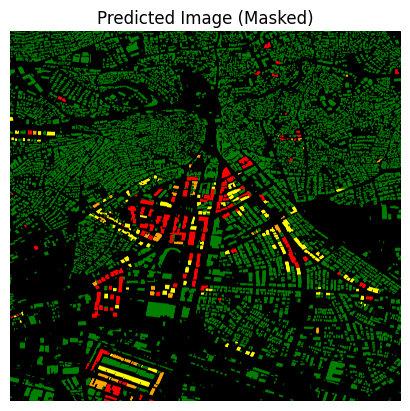

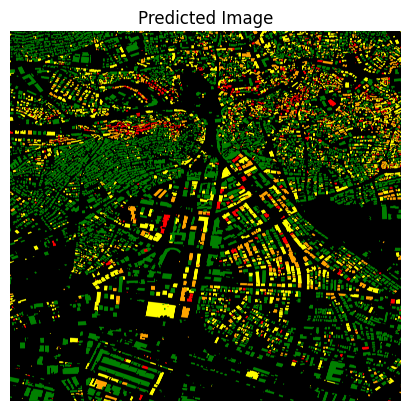

F1 score for No damage: 0.7695167467003013
F1 score for Minor damage: 0.0962002788290157
F1 score for Major damage: 0.03514229287402467


KeyboardInterrupt: ignored

In [ ]:
import numpy as np
from PIL import Image
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt


# Load the two PNG images, make sure the two images have the same resolution
predicted = np.array(Image.open("/content/drive/MyDrive/Temporary/4 of June images/KfirstNoAlpha.png"))
#print(predicted.shape, np.unique(predicted))
ground_truth = np.array(Image.open('/content/drive/MyDrive/Samhällsbyggnadsprogrammet/KEX/Results/KCopernicus.png'))
#print(ground_truth.shape, np.unique(ground_truth))

# Display the old predicted image
plt.imshow(ground_truth)
plt.title('Ground Truth')
plt.axis('off')
plt.show()
plt.imshow(predicted)
plt.title('Predicted Image')
plt.axis('off')
plt.show()


# Create a mask for areas to be masked out
mask = np.all(ground_truth == [0, 0, 0], axis=2)


#predicted_masked = np.where(ground_truth == 0, 255, predicted)
#print(predicted_masked.shape, np.unique(predicted_masked))

# Create the masked image
predicted_masked = np.where(mask[..., np.newaxis], [0, 0, 0], predicted)




class_colors_gt = {
    'No damage': (1, 128, 0),
    'Minor damage': (255, 254, 0),
    'Major damage': (255, 165, 0),
    'Destroyed': (255, 0, 0),
}

class_colors_pred = {
    'No damage': (1, 128, 0),
    'Minor damage': (255, 254, 0),
    'Major damage': (255, 165, 0),
    'Destroyed': (255, 0, 0),
}

# Initialize masks for ground truth and prediction
gt_mask = np.zeros(ground_truth.shape[:2], dtype=bool)
#print(gt_mask.shape, np.unique(gt_mask))
pred_mask = np.zeros(predicted_masked.shape[:2], dtype=bool)
#print(pred_mask.shape, np.unique(pred_mask))

# Calculate F1 score for each class
for class_name in class_colors_gt:
    color_gt = class_colors_gt[class_name]
    color_pred = class_colors_pred[class_name]
    

    # Create masks for the current class
    class_mask_gt = np.all(ground_truth == color_gt, axis=2)
    class_mask_pred = np.all(predicted_masked == color_pred, axis=2)

    # Flatten the masks and calculate F1 score
    f1 = f1_score(class_mask_gt.flatten(), class_mask_pred.flatten())
    print(f"F1 score for {class_name}: {f1}")




#F1 scores for each damage type in the Kahramanmaraş without shadows


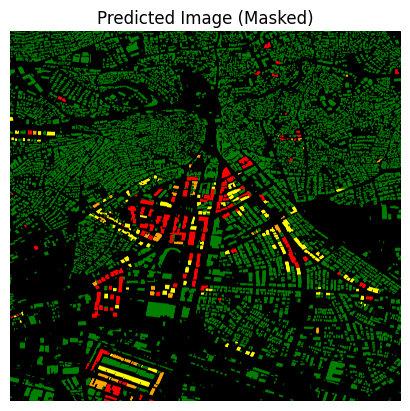

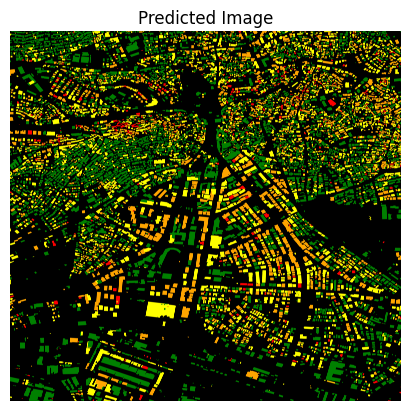

F1 score for No damage: 0.6473248882262346
F1 score for Minor damage: 0.08571755236063965
F1 score for Major damage: 0.07135671292977273
F1 score for Destroyed: 0.041696796791963385


In [ ]:
import numpy as np
from PIL import Image
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt


# Load the two PNG images, make sure the two images have the same resolution
predicted = np.array(Image.open("/content/drive/MyDrive/Temporary/4 of June images/KsecondNoAlpha.png"))
#print(predicted.shape, np.unique(predicted))
ground_truth = np.array(Image.open('/content/drive/MyDrive/Samhällsbyggnadsprogrammet/KEX/Results/KCopernicus.png'))
#print(ground_truth.shape, np.unique(ground_truth))

# Display the old predicted image
plt.imshow(ground_truth)
plt.title('Ground truth')
plt.axis('off')
plt.show()
plt.imshow(predicted)
plt.title('Predicted Image')
plt.axis('off')
plt.show()


# Create a mask for areas to be masked out
mask = np.all(ground_truth == [0, 0, 0], axis=2)


#predicted_masked = np.where(ground_truth == 0, 255, predicted)
#print(predicted_masked.shape, np.unique(predicted_masked))

# Create the masked image
predicted_masked = np.where(mask[..., np.newaxis], [0, 0, 0], predicted)




class_colors_gt = {
    'No damage': (1, 128, 0),
    'Minor damage': (255, 254, 0),
    'Major damage': (255, 165, 0),
    'Destroyed': (255, 0, 0),
}

class_colors_pred = {
    'No damage': (0, 128, 0),
    'Minor damage': (255, 255, 0),
    'Major damage': (255, 165, 0),
    'Destroyed': (255, 0, 0),
}

# Initialize masks for ground truth and prediction
gt_mask = np.zeros(ground_truth.shape[:2], dtype=bool)
#print(gt_mask.shape, np.unique(gt_mask))
pred_mask = np.zeros(predicted_masked.shape[:2], dtype=bool)
#print(pred_mask.shape, np.unique(pred_mask))

# Calculate F1 score for each class
for class_name in class_colors_gt:
    color_gt = class_colors_gt[class_name]
    color_pred = class_colors_pred[class_name]
    

    # Create masks for the current class
    class_mask_gt = np.all(ground_truth == color_gt, axis=2)
    class_mask_pred = np.all(predicted_masked == color_pred, axis=2)

    # Flatten the masks and calculate F1 score
    f1 = f1_score(class_mask_gt.flatten(), class_mask_pred.flatten())
    print(f"F1 score for {class_name}: {f1}")




#F1 scores for each damage type in the Antakya with shadows


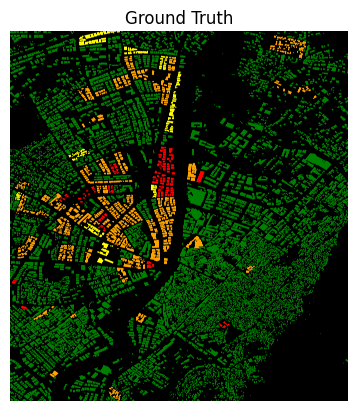

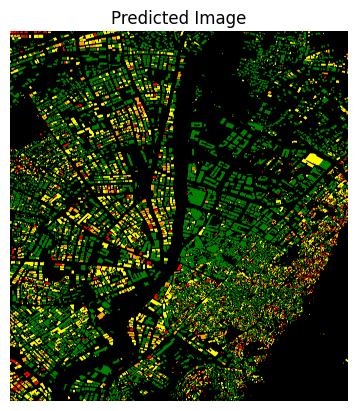

F1 score for No damage: 0.7439592064293216
F1 score for Minor damage: 0.054687978736026065
F1 score for Major damage: 0.10511666002373933
F1 score for Destroyed: 0.02932200436452949


In [ ]:
import numpy as np
from PIL import Image
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt


# Load the two PNG images, make sure the two images have the same resolution
predicted = np.array(Image.open("/content/drive/MyDrive/Temporary/4 of June images/AfirstNoAlpha.png"))
#print(predicted.shape, np.unique(predicted))
ground_truth = np.array(Image.open('/content/drive/MyDrive/Samhällsbyggnadsprogrammet/KEX/Results/ACopernicus.png'))
#print(ground_truth.shape, np.unique(ground_truth))

# Display the old predicted image
plt.imshow(ground_truth)
plt.title('Ground Truth')
plt.axis('off')
plt.show()
plt.imshow(predicted)
plt.title('Predicted Image')
plt.axis('off')
plt.show()


# Create a mask for areas to be masked out
mask = np.all(ground_truth == [0, 0, 0], axis=2)


#predicted_masked = np.where(ground_truth == 0, 255, predicted)
#print(predicted_masked.shape, np.unique(predicted_masked))

# Create the masked image
predicted_masked = np.where(mask[..., np.newaxis], [0, 0, 0], predicted)




class_colors_gt = {
    'No damage': (0, 128, 0),
    'Minor damage': (255, 255, 0),
    'Major damage': (255, 165, 0),
    'Destroyed': (255, 0, 0),
}

class_colors_pred = {
    'No damage': (1, 128, 0),
    'Minor damage': (255, 254, 0),
    'Major damage': (255, 165, 0),
    'Destroyed': (255, 0, 0),
}

# Initialize masks for ground truth and prediction
gt_mask = np.zeros(ground_truth.shape[:2], dtype=bool)
#print(gt_mask.shape, np.unique(gt_mask))
pred_mask = np.zeros(predicted_masked.shape[:2], dtype=bool)
#print(pred_mask.shape, np.unique(pred_mask))

# Calculate F1 score for each class
for class_name in class_colors_gt:
    color_gt = class_colors_gt[class_name]
    color_pred = class_colors_pred[class_name]
    

    # Create masks for the current class
    class_mask_gt = np.all(ground_truth == color_gt, axis=2)
    class_mask_pred = np.all(predicted_masked == color_pred, axis=2)

    # Flatten the masks and calculate F1 score
    f1 = f1_score(class_mask_gt.flatten(), class_mask_pred.flatten())
    print(f"F1 score for {class_name}: {f1}")




#F1 scores for each damage type in the Antakya without shadows


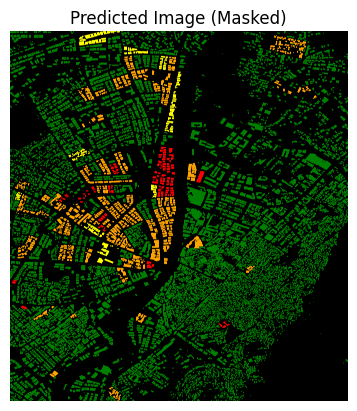

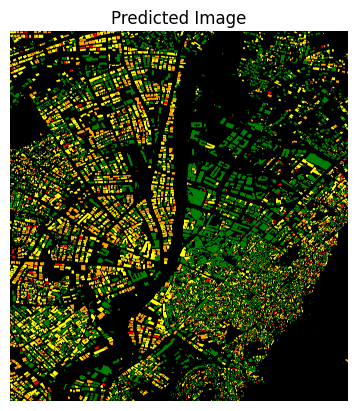

F1 score for No damage: 0.6580961716602699
F1 score for Minor damage: 0.054469186049724054
F1 score for Major damage: 0.22192532083412356
F1 score for Destroyed: 0.007322549985842193


In [ ]:
import numpy as np
from PIL import Image
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt


# Load the two PNG images, make sure the two images have the same resolution
predicted = np.array(Image.open("/content/drive/MyDrive/Temporary/4 of June images/AsecondNoAlpha.png"))
#print(predicted.shape, np.unique(predicted))
ground_truth = np.array(Image.open('/content/drive/MyDrive/Samhällsbyggnadsprogrammet/KEX/Results/ACopernicus.png'))
#print(ground_truth.shape, np.unique(ground_truth))

# Display the old predicted image
plt.imshow(ground_truth)
plt.title('Predicted Image (Masked)')
plt.axis('off')
plt.show()
plt.imshow(predicted)
plt.title('Predicted Image')
plt.axis('off')
plt.show()


# Create a mask for areas to be masked out
mask = np.all(ground_truth == [0, 0, 0], axis=2)


#predicted_masked = np.where(ground_truth == 0, 255, predicted)
#print(predicted_masked.shape, np.unique(predicted_masked))

# Create the masked image
predicted_masked = np.where(mask[..., np.newaxis], [0, 0, 0], predicted)




class_colors_gt = {
    'No damage': (0, 128, 0),
    'Minor damage': (255, 255, 0),
    'Major damage': (255, 165, 0),
    'Destroyed': (255, 0, 0),
}

class_colors_pred = {
    'No damage': (0, 128, 0),
    'Minor damage': (255, 255, 0),
    'Major damage': (255, 165, 0),
    'Destroyed': (255, 0, 0),
}

# Initialize masks for ground truth and prediction
gt_mask = np.zeros(ground_truth.shape[:2], dtype=bool)
#print(gt_mask.shape, np.unique(gt_mask))
pred_mask = np.zeros(predicted_masked.shape[:2], dtype=bool)
#print(pred_mask.shape, np.unique(pred_mask))

# Calculate F1 score for each class
for class_name in class_colors_gt:
    color_gt = class_colors_gt[class_name]
    color_pred = class_colors_pred[class_name]
    

    # Create masks for the current class
    class_mask_gt = np.all(ground_truth == color_gt, axis=2)
    class_mask_pred = np.all(predicted_masked == color_pred, axis=2)

    # Flatten the masks and calculate F1 score
    f1 = f1_score(class_mask_gt.flatten(), class_mask_pred.flatten())
    print(f"F1 score for {class_name}: {f1}")




#Combine damage classes into one

In [ ]:
from PIL import Image


def Combine(image_path, output_directory):
  # Open the image

  image = Image.open(image_path)

  # Convert the image to RGB mode if it's not already
  image = image.convert('RGB')

  # Get the pixel data
  pixels = image.load()

  # Iterate over each pixel
  width, height = image.size
  for x in range(width):
      for y in range(height):
          r, g, b = pixels[x, y]

          # Check if the pixel is not (0, 0, 0) and not (1, 128, 0)
          if (r, g, b) != (0, 0, 0) and (r, g, b) != (1, 128, 0):
              # Set the pixel to white
              pixels[x, y] = (255, 255, 255)
  # Save the modified image
  image.save(output_path)


image_path = "/content/drive/MyDrive/Temporary/4 of June images/AfirstNoAlpha.png"
output_path = '/content/drive/MyDrive/Temporary/4 of June images/AfirstCombinedDamage.png'
Combine(image_path,output_path)


image_path = "/content/drive/MyDrive/Temporary/4 of June images/KfirstNoAlpha.png"
output_path = '/content/drive/MyDrive/Temporary/4 of June images/KfirstCombinedDamage.png'
Combine(image_path,output_path)

image_path = "/content/drive/MyDrive/Samhällsbyggnadsprogrammet/KEX/Results/KCopernicus.png"
output_path = '/content/drive/MyDrive/Temporary/4 of June images/KCopernicusNoGrades.png'
Combine(image_path,output_path)

In [ ]:
from PIL import Image


def Combine(image_path, output_directory):
  # Open the image

  image = Image.open(image_path)

  # Convert the image to RGB mode if it's not already
  image = image.convert('RGB')

  # Get the pixel data
  pixels = image.load()

  # Iterate over each pixel
  width, height = image.size
  for x in range(width):
      for y in range(height):
          r, g, b = pixels[x, y]

          # Check if the pixel is not (0, 0, 0) and not (1, 128, 0)
          if (r, g, b) != (0, 0, 0) and (r, g, b) != (0, 128, 0):
              # Set the pixel to white
              pixels[x, y] = (255, 255, 255)
  # Save the modified image
  image.save(output_path)


#Example of use

image_path = "/content/drive/MyDrive/Temporary/4 of June images/AsecondNoAlpha.png"
output_path = '/content/drive/MyDrive/Temporary/4 of June images/AsecondCombinedDamage.png'
Combine(image_path,output_path)


image_path = "/content/drive/MyDrive/Temporary/4 of June images/KsecondNoAlpha.png"
output_path = '/content/drive/MyDrive/Temporary/4 of June images/KsecondCombinedDamage.png'
Combine(image_path,output_path)

image_path = "/content/drive/MyDrive/Samhällsbyggnadsprogrammet/KEX/Results/ACopernicus.png"
output_path = '/content/drive/MyDrive/Temporary/4 of June images/ACopernicusNoGrades.png'
Combine(image_path,output_path)



#F1 Score test Kahramanmaras Combined damage grade with shadow


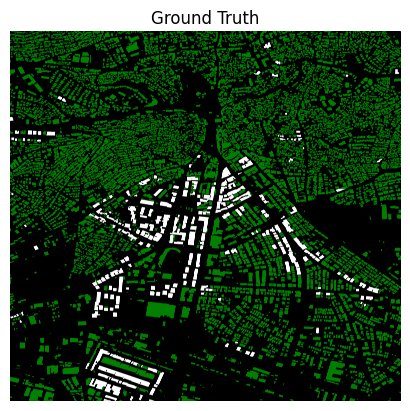

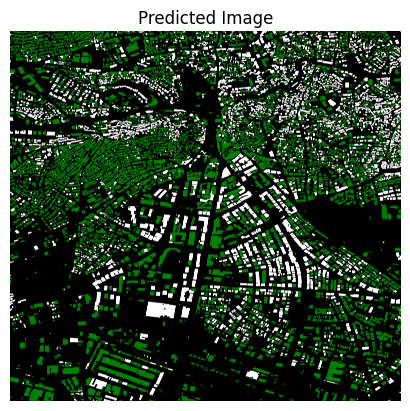

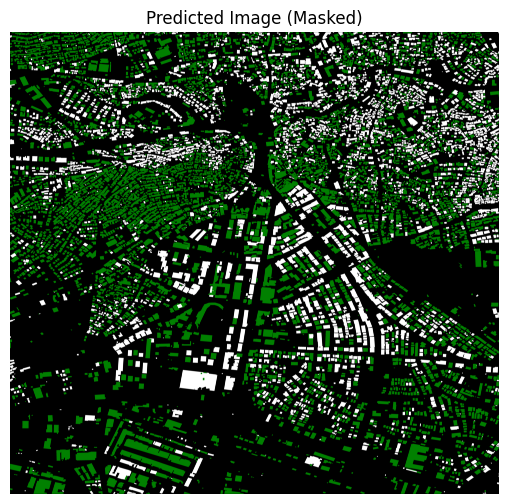

F1 score for Damage: 0.28291855192617693
F1 score for No damage: 0.7695167467003013


In [ ]:
import numpy as np
from PIL import Image
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt


# Load the two PNG images, make sure the two images have the same resolution
predicted = np.array(Image.open("/content/drive/MyDrive/Temporary/4 of June images/KfirstCombinedDamage.png"))
#print(predicted.shape, np.unique(predicted))
ground_truth = np.array(Image.open('/content/drive/MyDrive/Temporary/4 of June images/KCopernicusNoGrades.png'))
#print(ground_truth.shape, np.unique(ground_truth))

# Display the old predicted image
plt.imshow(ground_truth)
plt.title('Ground Truth')
plt.axis('off')
plt.show()
plt.imshow(predicted)
plt.title('Predicted Image')
plt.axis('off')
plt.show()


# Create a mask for areas to be masked out
mask = np.all(ground_truth == [0, 0, 0], axis=2)


#predicted_masked = np.where(ground_truth == 0, 255, predicted)
#print(predicted_masked.shape, np.unique(predicted_masked))

# Create the masked image
predicted_masked = np.where(mask[..., np.newaxis], [0, 0, 0], predicted)

# Display the new predicted image
plt.figure(figsize=(12,6))
plt.imshow(predicted_masked)
plt.title('Predicted Image (Masked)')
plt.axis('off')
plt.show()


class_colors_gt = {
    'Damage': (255, 255, 255),
    'No damage': (1, 128, 0),
}

class_colors_pred = {
    'Damage': (255, 255, 255),
    'No damage': (1, 128, 0),
    
}

# Initialize masks for ground truth and prediction
gt_mask = np.zeros(ground_truth.shape[:2], dtype=bool)
#print(gt_mask.shape, np.unique(gt_mask))
pred_mask = np.zeros(predicted_masked.shape[:2], dtype=bool)
#print(pred_mask.shape, np.unique(pred_mask))

# Calculate F1 score for each class
for class_name in class_colors_gt:
    color_gt = class_colors_gt[class_name]
    color_pred = class_colors_pred[class_name]
    

    # Create masks for the current class
    class_mask_gt = np.all(ground_truth == color_gt, axis=2)
    class_mask_pred = np.all(predicted_masked == color_pred, axis=2)

    # Flatten the masks and calculate F1 score
    f1 = f1_score(class_mask_gt.flatten(), class_mask_pred.flatten())
    print(f"F1 score for {class_name}: {f1}")




#F1 Score test Kahramanmaras Combined damage grade with shadow masked out


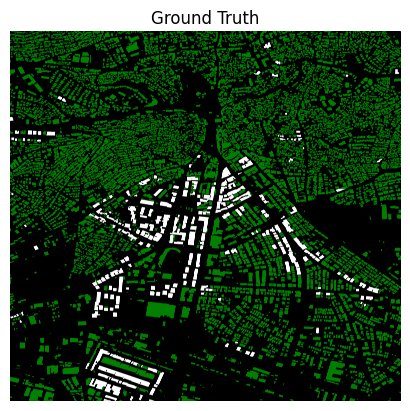

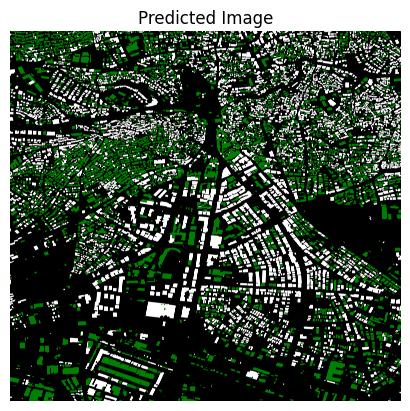

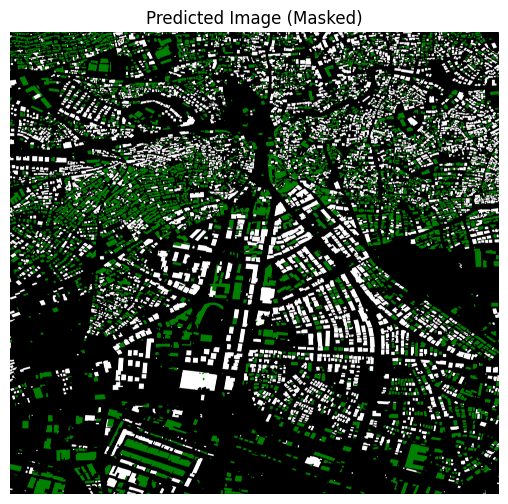

F1 score for Damage: 0.29767297377510765
F1 score for No damage: 0.6473248882262346


In [ ]:
import numpy as np
from PIL import Image
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt


# Load the two PNG images, make sure the two images have the same resolution
predicted = np.array(Image.open("/content/drive/MyDrive/Temporary/4 of June images/KsecondCombinedDamage.png"))
#print(predicted.shape, np.unique(predicted))
ground_truth = np.array(Image.open('/content/drive/MyDrive/Temporary/4 of June images/KCopernicusNoGrades.png'))
#print(ground_truth.shape, np.unique(ground_truth))

# Display the old predicted image
plt.imshow(ground_truth)
plt.title('Ground Truth')
plt.axis('off')
plt.show()
plt.imshow(predicted)
plt.title('Predicted Image')
plt.axis('off')
plt.show()


# Create a mask for areas to be masked out
mask = np.all(ground_truth == [0, 0, 0], axis=2)


#predicted_masked = np.where(ground_truth == 0, 255, predicted)
#print(predicted_masked.shape, np.unique(predicted_masked))

# Create the masked image
predicted_masked = np.where(mask[..., np.newaxis], [0, 0, 0], predicted)

# Display the new predicted image
plt.figure(figsize=(12,6))
plt.imshow(predicted_masked)
plt.title('Predicted Image (Masked)')
plt.axis('off')
plt.show()


class_colors_gt = {
    'Damage': (255, 255, 255),
    'No damage': (1, 128, 0),
}

class_colors_pred = {
    'Damage': (255, 255, 255),
    'No damage': (0, 128, 0),
    
}

# Initialize masks for ground truth and prediction
gt_mask = np.zeros(ground_truth.shape[:2], dtype=bool)
#print(gt_mask.shape, np.unique(gt_mask))
pred_mask = np.zeros(predicted_masked.shape[:2], dtype=bool)
#print(pred_mask.shape, np.unique(pred_mask))

# Calculate F1 score for each class
for class_name in class_colors_gt:
    color_gt = class_colors_gt[class_name]
    color_pred = class_colors_pred[class_name]
    

    # Create masks for the current class
    class_mask_gt = np.all(ground_truth == color_gt, axis=2)
    class_mask_pred = np.all(predicted_masked == color_pred, axis=2)

    # Flatten the masks and calculate F1 score
    f1 = f1_score(class_mask_gt.flatten(), class_mask_pred.flatten())
    print(f"F1 score for {class_name}: {f1}")




#F1 Score test Antakya Combined damage grade with shadow


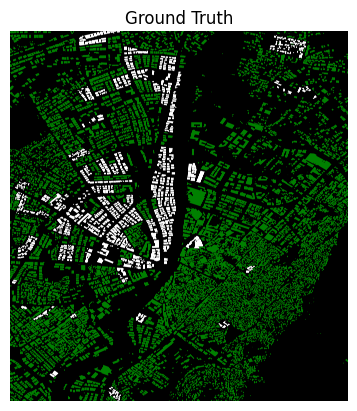

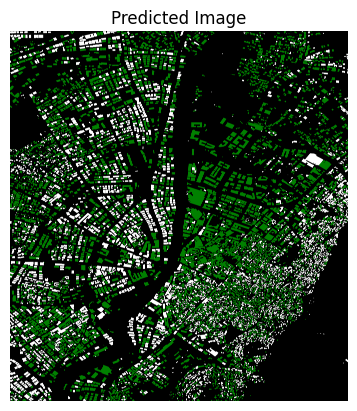

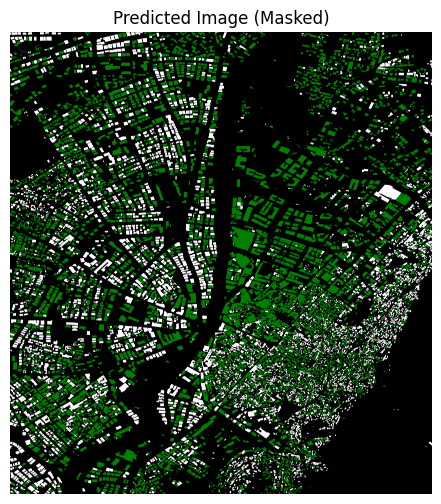

F1 score for Damage: 0.2777635426114201
F1 score for No damage: 0.7439592064293216


In [ ]:
import numpy as np
from PIL import Image
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt


# Load the two PNG images, make sure the two images have the same resolution
predicted = np.array(Image.open("/content/drive/MyDrive/Temporary/4 of June images/AfirstCombinedDamage.png"))
#print(predicted.shape, np.unique(predicted))
ground_truth = np.array(Image.open('/content/drive/MyDrive/Temporary/4 of June images/ACopernicusNoGrades.png'))
#print(ground_truth.shape, np.unique(ground_truth))

# Display the old predicted image
plt.imshow(ground_truth)
plt.title('Ground Truth')
plt.axis('off')
plt.show()
plt.imshow(predicted)
plt.title('Predicted Image')
plt.axis('off')
plt.show()


# Create a mask for areas to be masked out
mask = np.all(ground_truth == [0, 0, 0], axis=2)


#predicted_masked = np.where(ground_truth == 0, 255, predicted)
#print(predicted_masked.shape, np.unique(predicted_masked))

# Create the masked image
predicted_masked = np.where(mask[..., np.newaxis], [0, 0, 0], predicted)

# Display the new predicted image
plt.figure(figsize=(12,6))
plt.imshow(predicted_masked)
plt.title('Predicted Image (Masked)')
plt.axis('off')
plt.show()


class_colors_gt = {
    'Damage': (255, 255, 255),
    'No damage': (0, 128, 0),
}

class_colors_pred = {
    'Damage': (255, 255, 255),
    'No damage': (1, 128, 0),
    
}

# Initialize masks for ground truth and prediction
gt_mask = np.zeros(ground_truth.shape[:2], dtype=bool)
#print(gt_mask.shape, np.unique(gt_mask))
pred_mask = np.zeros(predicted_masked.shape[:2], dtype=bool)
#print(pred_mask.shape, np.unique(pred_mask))

# Calculate F1 score for each class
for class_name in class_colors_gt:
    color_gt = class_colors_gt[class_name]
    color_pred = class_colors_pred[class_name]
    

    # Create masks for the current class
    class_mask_gt = np.all(ground_truth == color_gt, axis=2)
    class_mask_pred = np.all(predicted_masked == color_pred, axis=2)

    # Flatten the masks and calculate F1 score
    f1 = f1_score(class_mask_gt.flatten(), class_mask_pred.flatten())
    print(f"F1 score for {class_name}: {f1}")




#F1 Score test Kahramanmaras Combined damage grade with shadow masked out


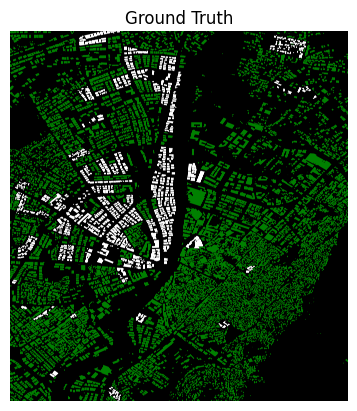

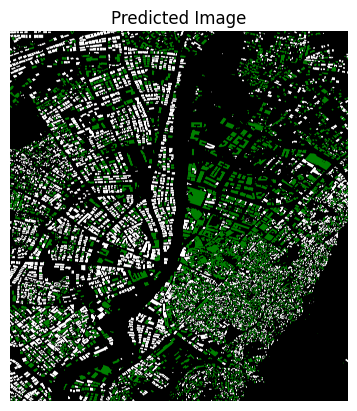

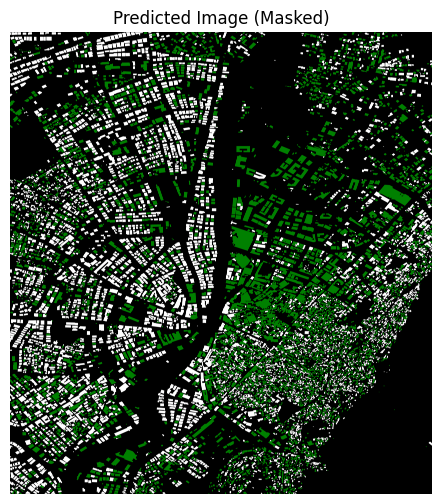

F1 score for Damage: 0.3216490230967017
F1 score for No damage: 0.6580961716602699


In [ ]:
import numpy as np
from PIL import Image
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt


# Load the two PNG images, make sure the two images have the same resolution
predicted = np.array(Image.open("/content/drive/MyDrive/Temporary/4 of June images/AsecondCombinedDamage.png"))
#print(predicted.shape, np.unique(predicted))
ground_truth = np.array(Image.open('/content/drive/MyDrive/Temporary/4 of June images/ACopernicusNoGrades.png'))
#print(ground_truth.shape, np.unique(ground_truth))

# Display the old predicted image
plt.imshow(ground_truth)
plt.title('Ground Truth')
plt.axis('off')
plt.show()
plt.imshow(predicted)
plt.title('Predicted Image')
plt.axis('off')
plt.show()


# Create a mask for areas to be masked out
mask = np.all(ground_truth == [0, 0, 0], axis=2)


#predicted_masked = np.where(ground_truth == 0, 255, predicted)
#print(predicted_masked.shape, np.unique(predicted_masked))

# Create the masked image
predicted_masked = np.where(mask[..., np.newaxis], [0, 0, 0], predicted)

# Display the new predicted image
plt.figure(figsize=(12,6))
plt.imshow(predicted_masked)
plt.title('Predicted Image (Masked)')
plt.axis('off')
plt.show()


class_colors_gt = {
    'Damage': (255, 255, 255),
    'No damage': (0, 128, 0),
}

class_colors_pred = {
    'Damage': (255, 255, 255),
    'No damage': (0, 128, 0),
    
}

# Initialize masks for ground truth and prediction
gt_mask = np.zeros(ground_truth.shape[:2], dtype=bool)
#print(gt_mask.shape, np.unique(gt_mask))
pred_mask = np.zeros(predicted_masked.shape[:2], dtype=bool)
#print(pred_mask.shape, np.unique(pred_mask))

# Calculate F1 score for each class
for class_name in class_colors_gt:
    color_gt = class_colors_gt[class_name]
    color_pred = class_colors_pred[class_name]
    

    # Create masks for the current class
    class_mask_gt = np.all(ground_truth == color_gt, axis=2)
    class_mask_pred = np.all(predicted_masked == color_pred, axis=2)

    # Flatten the masks and calculate F1 score
    f1 = f1_score(class_mask_gt.flatten(), class_mask_pred.flatten())
    print(f"F1 score for {class_name}: {f1}")


